# Examen Final: 420-DK1-GC Rapports et Tableaux de bords
__Groupe:__ 82107   
__Durée:__ 2 heures

# Lecture du fichier

L'ensemble de données contient des données sur les clients d'une société de cartes de crédit et est utilisé pour prédire le taux de désabonnement. Voici les variables qu'il contient :

`customer_id / identifiant_client:` Un identifiant unique pour chaque client.  
`age / âge:` L'âge du client.  
`gender/ sexe:` Le sexe du client.  
`education_level / niveau_éducation:` Le niveau d'éducation le plus élevé atteint par le client.  
`marital_status/ état_civil:` L'état civil du client (par exemple, célibataire, marié, divorcé).  
`estimated_income / revenu_estimé:` Le revenu annuel estimé du client.  
`months_on_book / mois_dans_les_registres:` Le nombre de mois pendant lesquels le client a été enregistré auprès de l'entreprise.  
`credit_limit / limite_de_crédit:` Le montant maximum de crédit accordé au client.  
`total_trans_amount / montant_total_des_transactions:` Le montant total des transactions effectuées par le client sur une période spécifiée.  
`total_trans_count / nombre_total_des_transactions:` Le nombre total de transactions effectuées par le client sur une période spécifiée.  
`churn / desabonnement:` Un indicateur binaire de savoir si le client a arrêté d'utiliser le service.  
`year / année:` L'année où les données ont été enregistrées.  

**Question 1:** *(1 point)* visualiser le fichier *churn_predit_over_time.csv* par un dataframe

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn_predict_over_time.csv',header=0)
df

,customer_id,age,gender,education_level,marital_status,estimated_income,months_on_book,credit_limit,total_trans_amount,total_trans_count,churn,year
0,768805383,45,M,High School,Married,69000,39,12691.0,1144,42,0,2018
1,818770008,49,F,Graduate,Single,24000,44,8256.0,1291,33,0,2018
2,713982108,51,M,Graduate,Married,93000,36,3418.0,1887,20,0,2018
3,769911858,40,F,High School,Unknown,37000,34,3313.0,1171,20,0,2018
4,709106358,40,M,Uneducated,Married,65000,21,4716.0,816,28,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
81010,788814783,39,M,Uneducated,Single,60000,22,9204.0,1820,58,0,2022
81011,711711483,61,M,High School,Married,92000,50,2800.0,1433,40,0,2022
81012,713269533,42,M,College,Single,118000,36,9959.0,8847,85,1,2022
81013,719070108,44,M,Graduate,Married,115000,35,34516.0,1729,52,0,2022


Procédant par un analyse rapide du jeud de donnée

**Question 2:** *(1 point)* Valider si l'ensemble des données contient des valeurs nulles. D'après vous, l'assignation automatique du type de données corresponds elle au besoin d'analyse, pourquoi?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81015 entries, 0 to 81014
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         81015 non-null  int64  
 1   age                 81015 non-null  int64  
 2   gender              81015 non-null  object 
 3   education_level     81015 non-null  object 
 4   marital_status      81015 non-null  object 
 5   estimated_income    81015 non-null  int64  
 6   months_on_book      81015 non-null  int64  
 7   credit_limit        81015 non-null  float64
 8   total_trans_amount  81015 non-null  int64  
 9   total_trans_count   81015 non-null  int64  
 10  churn               81015 non-null  int64  
 11  year                81015 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 7.4+ MB


**Question 3:** *(1 point)* Changer l'entête du dataframe avec une entête en français (utiliser la description en haut pour les titres)

In [4]:
header =  ['identifiant_client','age', 'sexe', 'niveau_education', 'etat_civil', 'revenu_estime'
          , 'mois_dans_les_registres', 'limite_credit', 'montant_total_des_transactions' 
          , 'nombre_total_des_transactions', 'desabonnement', 'année']

In [5]:
df.columns = header
df

,identifiant_client,age,sexe,niveau_education,etat_civil,revenu_estime,mois_dans_les_registres,limite_credit,montant_total_des_transactions,nombre_total_des_transactions,desabonnement,année
0,768805383,45,M,High School,Married,69000,39,12691.0,1144,42,0,2018
1,818770008,49,F,Graduate,Single,24000,44,8256.0,1291,33,0,2018
2,713982108,51,M,Graduate,Married,93000,36,3418.0,1887,20,0,2018
3,769911858,40,F,High School,Unknown,37000,34,3313.0,1171,20,0,2018
4,709106358,40,M,Uneducated,Married,65000,21,4716.0,816,28,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
81010,788814783,39,M,Uneducated,Single,60000,22,9204.0,1820,58,0,2022
81011,711711483,61,M,High School,Married,92000,50,2800.0,1433,40,0,2022
81012,713269533,42,M,College,Single,118000,36,9959.0,8847,85,1,2022
81013,719070108,44,M,Graduate,Married,115000,35,34516.0,1729,52,0,2022


**Question 4:** *(1 point)* Calculer le nombre des valeurs uniques de la colonne `identifiant_client`. Que peut on déduire?

In [6]:
df.identifiant_client.nunique()

10127

**Question 5:** *(1 point)* lister les valeurs distinctes pour chacune des colonnes `sexe`, `niveau_education` et `etat_civil`

In [8]:
df['sexe'].unique()

array(['M', 'F'], dtype=object)

In [9]:
df.niveau_education.unique()

array(['High School', 'Graduate', 'Uneducated', 'Post-Graduate',
       'College', 'Doctorate'], dtype=object)

In [10]:
df.etat_civil.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

**Question 6:** *(1 point)* quelle est la rangé de la colonne annee

In [11]:
print(df['année'].min(), '-', df['année'].max())

2018 - 2022


**Question 7:** *(1 point)* modifier la colonne `sexe` en changant `M` par `Male` et `F` par `Femelle`

In [35]:
df['sexe'] = df['sexe'].replace({'M': 'Male', 'F': 'Femelle'})

In [36]:
df

,identifiant_client,age,sexe,niveau_education,etat_civil,revenu_estime,mois_dans_les_registres,limite_credit,montant_total_des_transactions,nombre_total_des_transactions,desabonnement,année
0,768805383,45,Male,High School,Married,69000,39,12691.0,1144,42,0,2018
1,818770008,49,Femelle,Graduate,Single,24000,44,8256.0,1291,33,0,2018
2,713982108,51,Male,Graduate,Married,93000,36,3418.0,1887,20,0,2018
3,769911858,40,Femelle,High School,Unknown,37000,34,3313.0,1171,20,0,2018
4,709106358,40,Male,Uneducated,Married,65000,21,4716.0,816,28,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
81010,788814783,39,Male,Uneducated,Single,60000,22,9204.0,1820,58,0,2022
81011,711711483,61,Male,High School,Married,92000,50,2800.0,1433,40,0,2022
81012,713269533,42,Male,College,Single,118000,36,9959.0,8847,85,1,2022
81013,719070108,44,Male,Graduate,Married,115000,35,34516.0,1729,52,0,2022


**Question 8:** *(1 point)* créer un sous-ensemble [`identifiant_client`	`age`	`sexe`	`niveau_education`	`etat_civil`	] de donnée contenant seulement la list des valeurs uniques

In [37]:
UniqueClients = df[['identifiant_client', 'age', 'sexe', 'niveau_education', 'etat_civil']].drop_duplicates()
UniqueClients

,identifiant_client,age,sexe,niveau_education,etat_civil
0,768805383,45,Male,High School,Married
1,818770008,49,Femelle,Graduate,Single
2,713982108,51,Male,Graduate,Married
3,769911858,40,Femelle,High School,Unknown
4,709106358,40,Male,Uneducated,Married
...,...,...,...,...,...
10122,772366833,50,Male,Graduate,Single
10123,710638233,41,Male,Graduate,Divorced
10124,716506083,44,Femelle,High School,Married
10125,717406983,30,Male,Graduate,Unknown


**Question 9:** *(1 point)* compter le nombre des différentes catégorie de  la colonne `etat_civil`

In [38]:
counts = UniqueClients['etat_civil'].value_counts()
counts

etat_civil
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

**Question 10:** *(2 point)* Representer le nombre des categorie de la colonne  `etat_civil` en un graphique à barre. suivre les consigne suivante
- `dimension figure:` 8 x 6 
- `titre:` Compte des états civils
- `x-label:` État civil
- `y-label:` nombre
- `couleur des barre:` [bleu, vert, orange, rouge, violet ] 

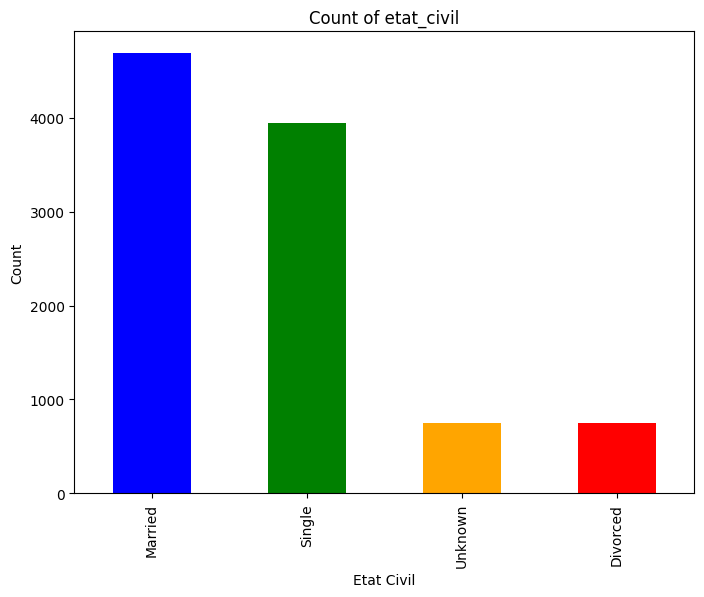

In [31]:
# Plotting the count of the 'etat_civil' column
plt.figure(figsize=(8, 6))
# UniqueClients['etat_civil'].value_counts().plot(kind='bar')
counts = UniqueClients['etat_civil'].value_counts()
counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Count of etat_civil')
plt.xlabel('Etat Civil')
plt.ylabel('Count')
plt.show()

**Question 11:** *(2 points)* quelle est le nombre de `Male` et `Femelle` et le pourcentage de chacun.  
*résulat:*
  
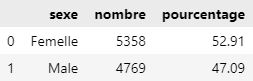

In [39]:
grouped = UniqueClients.groupby('sexe').size().reset_index(name='nombre')
grouped

,sexe,nombre
0,Femelle,5358
1,Male,4769


In [40]:
grouped['pourcentage'] = round((grouped['nombre'] / grouped['nombre'].sum()) * 100,2)
grouped

,sexe,nombre,pourcentage
0,Femelle,5358,52.91
1,Male,4769,47.09


**Question 12:** *(2 points)* présenter la distribution du `sexe` par un graphe en camembert

*resultat:*  
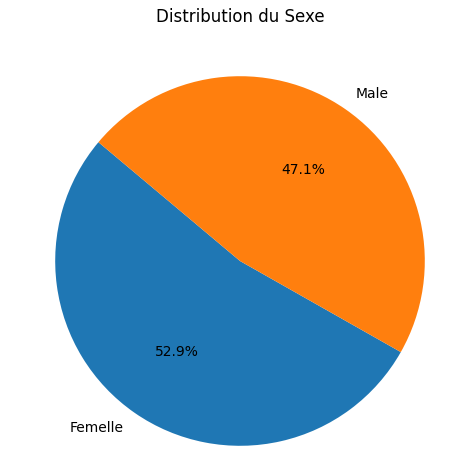

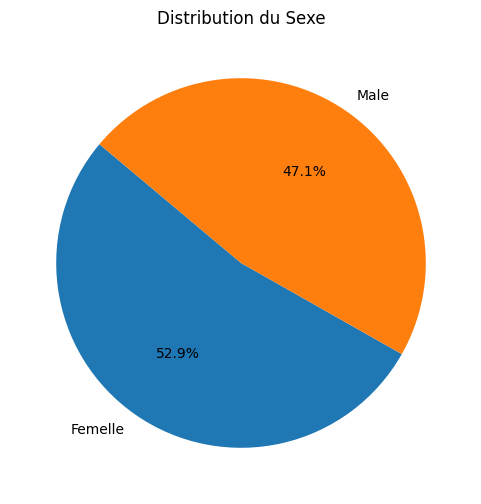

In [41]:
import matplotlib.pyplot as plt


# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped['nombre'], labels=grouped['sexe'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution du Sexe')
plt.show()

**Question 13:** *(2 points)* Tracer la distribution d'âge de l'ensemble des clients  
*consigne:* 
- Choisir la taille du `bin` = 10
- la couleur `skyblue` 



Text(0, 0.5, 'Frequency')

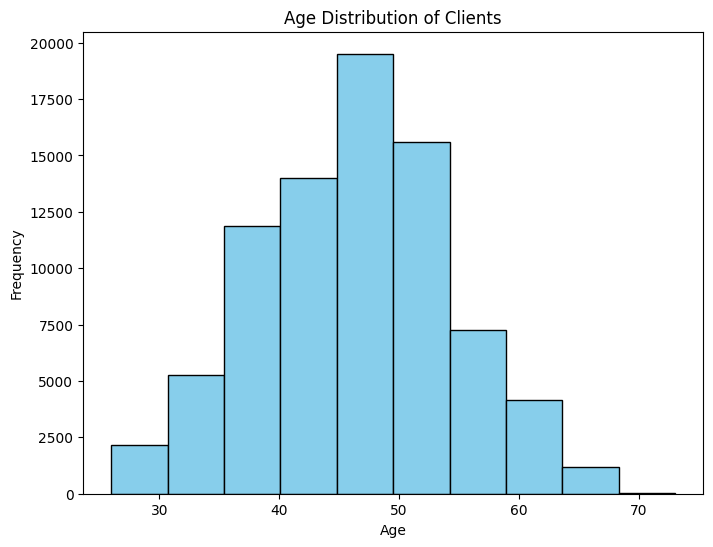

In [22]:
# Plot a histogram of the 'age' column
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [49]:
df[df.identifiant_client==768805383]

,identifiant_client,age,sexe,niveau_education,etat_civil,revenu_estime,mois_dans_les_registres,limite_credit,montant_total_des_transactions,nombre_total_des_transactions,desabonnement,année
0,768805383,45,Male,High School,Married,69000,39,12691.0,1144,42,0,2018
10127,768805383,45,Male,High School,Married,69000,39,12691.0,1144,42,0,2019
23292,768805383,45,Male,High School,Married,69000,39,12691.0,1144,42,0,2020
39495,768805383,45,Male,High School,Married,69000,39,12691.0,1144,42,0,2021
58736,768805383,45,Male,High School,Married,69000,39,12691.0,1144,42,0,2022


In [46]:
df.identifiant_client.unique()

array([768805383, 818770008, 713982108, ..., 716506083, 717406983,
       714337233], dtype=int64)

**Question 14:** *(3 points)* quel est le nombre de clients qui ont la limite de credit maximale

In [59]:
df[df.limite_credit==df.limite_credit.max()]['identifiant_client'].nunique()

508